In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from ripple_heterogeneity.replay import replay_run, influence_of_layer_bias_on_replay
from ripple_heterogeneity.readout import readout_explained_var
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
from sklearn.cluster import KMeans
import os
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [3]:
save_path = (
    r"Z:\home\ryanh\projects\ripple_heterogeneity\readout_explained_var_ripples_extend_50ms_w_pairwise_corr"
)
ev_df, pairwise_corr_df = readout_explained_var.load_results(save_path)


In [4]:
ripple_df = pd.DataFrame()
for basepath in ev_df.basepath.unique():
    ripple_df = pd.concat([ripple_df,loading.load_ripples_events(basepath)],ignore_index=True)

In [5]:
save_path = (
    r"Z:\home\ryanh\projects\ripple_heterogeneity\ripple_layer_bias"
)

batch_analysis.run(
    ev_df,
    save_path,
    influence_of_layer_bias_on_replay.run,
    parallel=True,
    overwrite=False,
    replay_df=ripple_df,
    n_shuffles=1000,
    q_perc=95
)
# load results
df_layer_bias = influence_of_layer_bias_on_replay.load_results(save_path)

100%|██████████| 56/56 [00:03<00:00, 17.01it/s] 


In [13]:
df_layer_bias[df_layer_bias.pval_deep < 0.05].basepath.value_counts(
    
)

Z:\Data\AYAold\AYA9\day17        587
Z:\Data\Kenji\ec014.345_366      498
Z:\Data\Kenji\ec014.171_188      363
Z:\Data\Kenji\ec016.267_278      316
Z:\Data\Kenji\ec016.425_437      260
Z:\Data\HMC1\day10               241
Z:\Data\HMC1\day8                235
Z:\Data\HMC1\day9                202
Z:\Data\Kenji\ec014.192_204      165
Z:\Data\Kenji\ec016.491_508      165
Z:\Data\Kenji\ec013.702_724      127
Z:\Data\Kenji\ec014.427_456      127
Z:\Data\Kenji\ec013.656_674      124
Z:\Data\Kenji\ec013.393_418      121
Z:\Data\AYAold\AYA9\day16        120
Z:\Data\FujisawaS\EE\EE0708fm    105
Z:\Data\Kenji\ec014.329_340      100
Z:\Data\Kenji\ec014.271_287       97
Z:\Data\Kenji\ec014.207_234       97
Z:\Data\AYAold\AYA7\day19         93
Z:\Data\Kenji\ec016.577_590       85
Z:\Data\AYAold\AYA9\day14         76
Z:\Data\Kenji\ec016.281_298       66
Z:\Data\AYAold\AYA9\day12         64
Z:\Data\Kenji\ec016.532_540       53
Z:\Data\FujisawaS\EE\EE0705fm     48
Z:\Data\Kenji\ec016.479_487       44
Z

In [53]:
df_layer_bias.shape[0]

282194

In [6]:
print(np.sum(df_layer_bias.pval_deep < 0.05),np.sum(df_layer_bias.pval_sup < 0.05),np.sum(df_layer_bias.pval_middle < 0.05))
np.sum(df_layer_bias.pval_deep < 0.05)/df_layer_bias.shape[0],np.sum(df_layer_bias.pval_sup < 0.05)/df_layer_bias.shape[0],np.sum(df_layer_bias.pval_middle < 0.05)/df_layer_bias.shape[0]


4903 4020 6260


(0.017374572102879578, 0.014245519040092986, 0.02218332069427415)

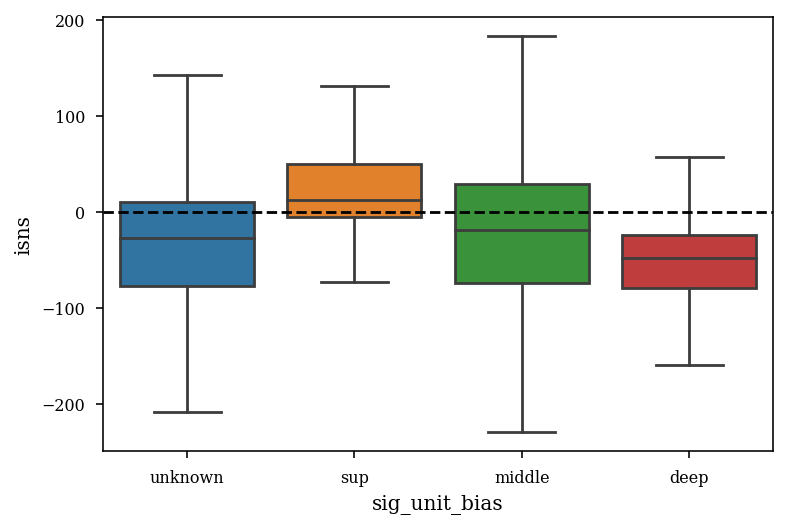

In [7]:
sns.boxplot(x="sig_unit_bias",y="isns",data=df_layer_bias,showfliers=False)
# sns.stripplot(x="sig_unit_bias",y="effective",data=df_layer_bias)
plt.axhline(0,color='k',linestyle='--')
# plt.yscale("log")

In [8]:
df_layer_bias.keys()


Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'sig_unit_bias', 'n_deep_obs', 'n_sup_obs',
       'n_middle_obs', 'pval_deep', 'pval_sup', 'pval_middle', 'event_id',
       'balance', 'effective', 'equal', 'ins', 'isns'],
      dtype='object')

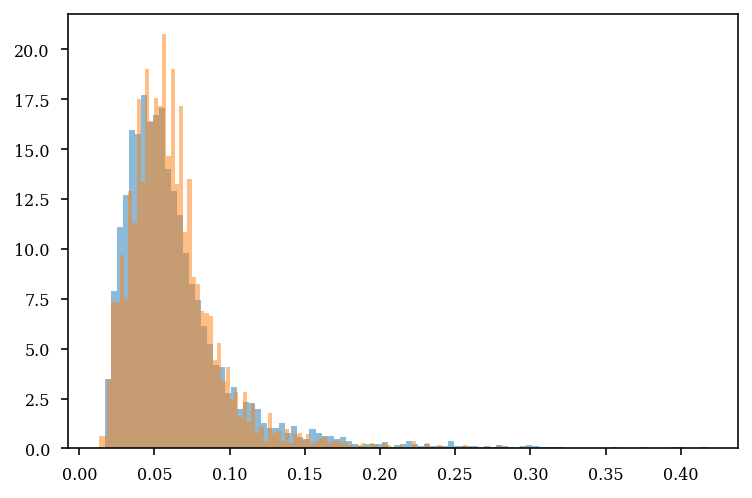

In [9]:
plt.hist(df_layer_bias[df_layer_bias.pval_deep < 0.05].duration,100,density=True,alpha=0.5)
plt.hist(df_layer_bias[df_layer_bias.pval_sup < 0.05].duration,100,density=True,alpha=0.5)
# plt.hist(df_layer_bias[df_layer_bias.pval_middle < 0.05].duration,100,density=True,alpha=0.5)

plt.show()

Text(0.5, 0.98, 'deep')

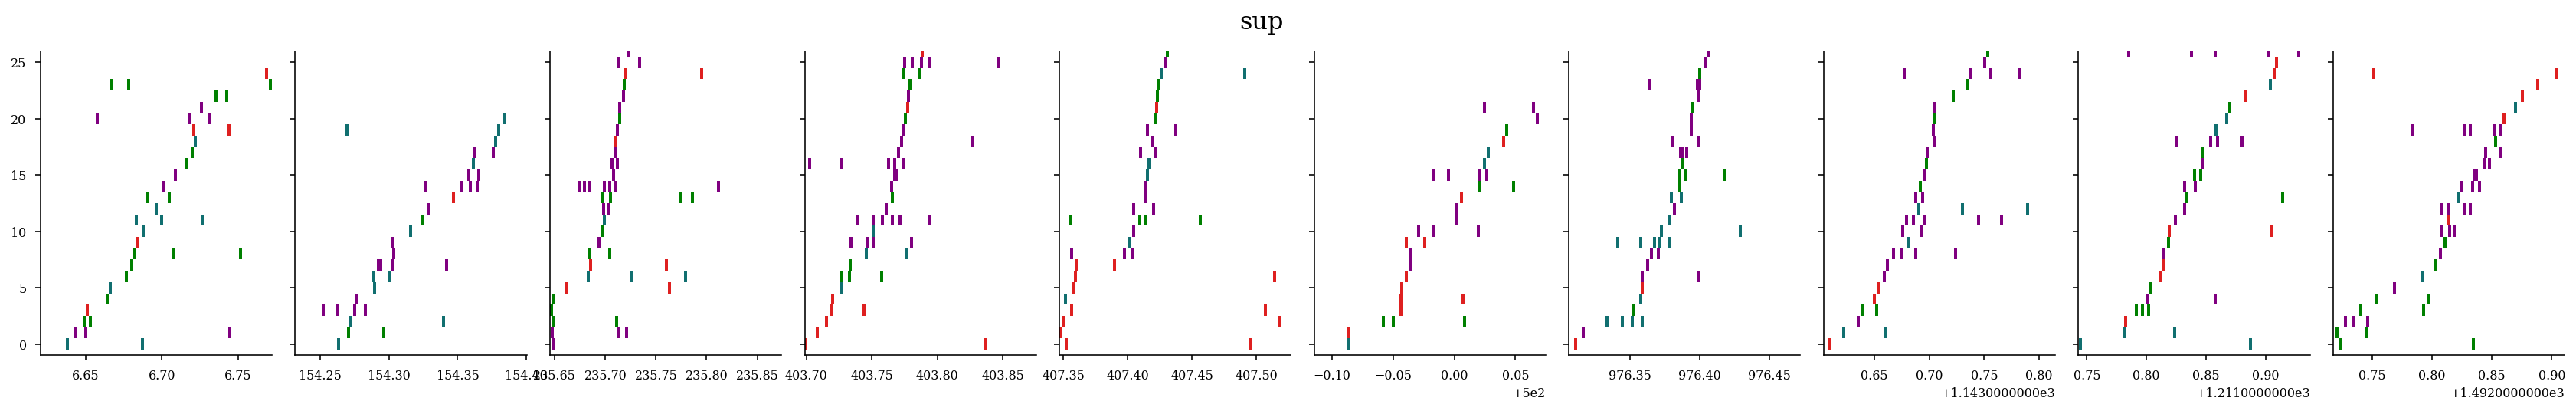

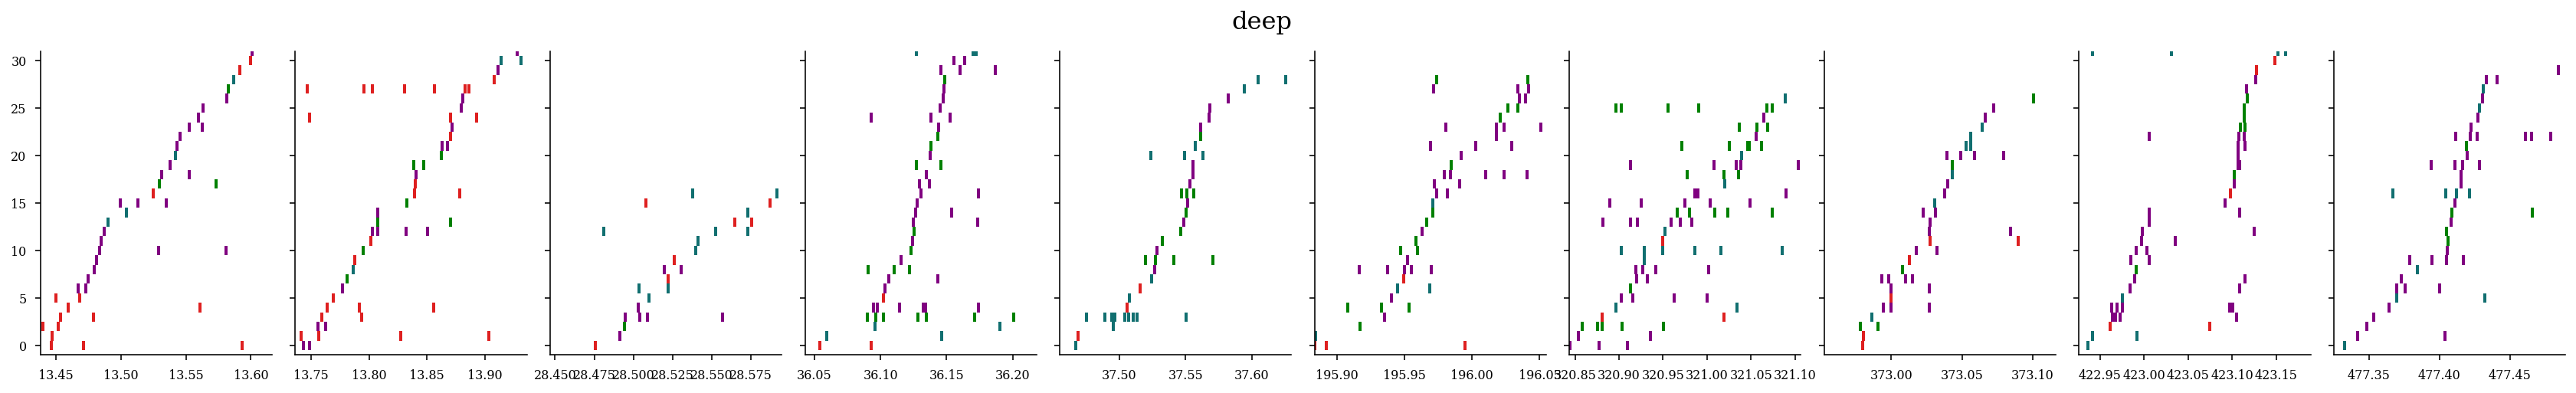

In [66]:
def get_color_code(cell_metrics):
    colors1 = []
    for i in range(len(cell_metrics["deepSuperficial"])):
        if cell_metrics.brainRegion.str.contains("EC1|EC2|EC3|EC4|EC5|MEC").iloc[i]:
            colors1.append("#de2020")
        elif cell_metrics.brainRegion.str.contains("PFC").iloc[i]:
            colors1.append("#116f70")
        elif cell_metrics.deepSuperficial.iloc[i] == "Deep":
            # colors1.append('#7b3294')
            colors1.append("purple")
        elif cell_metrics.deepSuperficial.iloc[i] == "Superficial":
            # colors1.append('#008837')
            colors1.append("green")
        else:
            colors1.append("lightgrey")
    return colors1


def plot_raster_examples(st, replay_canidates, cell_metrics, events):

    if isinstance(events, int):
        n_panels = 1
    else:
        n_panels = len(events)

    figsize = functions.set_size("thesis", fraction=n_panels / 2, subplots=(2, n_panels))
    fig, axs = plt.subplots(
        1,
        n_panels,
        figsize=figsize,
        edgecolor="k",
        sharey=True,
    )
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    axs = axs.ravel()

    for i, event in enumerate(events):

        # idx = np.where(cell_metrics.brainRegion.str.contains("CA1").values)[0].astype(int)+1

        rank_orders, rank_order_mat = functions.get_rank_order(
            st, replay_canidates[int(event)], method="peak_fr", padding=0
        )
        colors1 = get_color_code(cell_metrics)
        order_idx = np.argsort(rank_orders)

        # order_idx = np.hstack([order_idx,np.arange(order_idx.max()+1,order_idx.max() + cell_metrics.brainRegion.str.contains("MEC").sum())])

        # npl.rasterplot(st.reorder_series_by_ids(order_idx+1)[replay_canidates[int(event)]],ax=axs[i])
        axs[i].eventplot(
            st[replay_canidates[int(event)]].data[order_idx],
            colors=np.array(colors1)[order_idx],
            linelengths=1,
            linewidths=2,
        )
        # dir(st)
        axs[i].set_ylim(-1, st[replay_canidates[int(event)]].n_active + 1)
        axs[i].set_xlim(replay_canidates[int(event)].start, replay_canidates[int(event)].stop)
        sns.despine()
    return fig,axs
# plot_raster_examples(st, replay_canidates, cell_metrics, np.where(temp_df.gmm_labels == "sup")[0][0:10])
# plot_raster_examples(st, replay_canidates, cell_metrics, np.where(temp_df.gmm_labels == "deep")[0][0:10])
# plot_raster_examples(st, replay_canidates, cell_metrics, np.where(temp_df.gmm_labels == "mixed")[0][0:10])

basepath = r"Z:\Data\HMC1\day10"

temp_df = df_layer_bias[(df_layer_bias.basepath == basepath)]
st, cell_metrics = loading.load_spikes(
    basepath, brainRegion=["CA1","PFC","MEC"], putativeCellType="Pyr"
)
# st, cell_metrics = loading.load_spikes(
#     basepath, brainRegion="CA1", putativeCellType="Pyr"
# )
# sup_ripple_epochs = nel.EpochArray(np.array([temp_df[temp_df.gmm_labels == "sup"].start, temp_df[temp_df.gmm_labels == "sup"].stop]).T).expand(0.05).merge()
# deep_ripple_epochs = nel.EpochArray(np.array([temp_df[temp_df.gmm_labels == "deep"].start, temp_df[temp_df.gmm_labels == "deep"].stop]).T).expand(0.05).merge()
# mixed_ripple_epochs = nel.EpochArray(np.array([temp_df[temp_df.gmm_labels == "mixed"].start, temp_df[temp_df.gmm_labels == "mixed"].stop]).T).expand(0.05).merge()
replay_canidates = nel.EpochArray(np.array([temp_df.start, temp_df.stop]).T).expand(0.05).merge()


fig,axs = plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "sup"))[0][0:10])
fig.suptitle('sup', fontsize=16)
fig,axs =plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "deep" ))[0][0:10])
fig.suptitle('deep', fontsize=16)

# fig,axs =plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "middle"))[0][0:10])
# fig.suptitle('middle', fontsize=16)

# fig,axs =plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "unknown"))[0][0:10])
# fig.suptitle('unknown', fontsize=16)

In [69]:
np.sum(temp_df.sig_unit_bias == "deep")

250

Text(0.5, 0.98, 'mec')

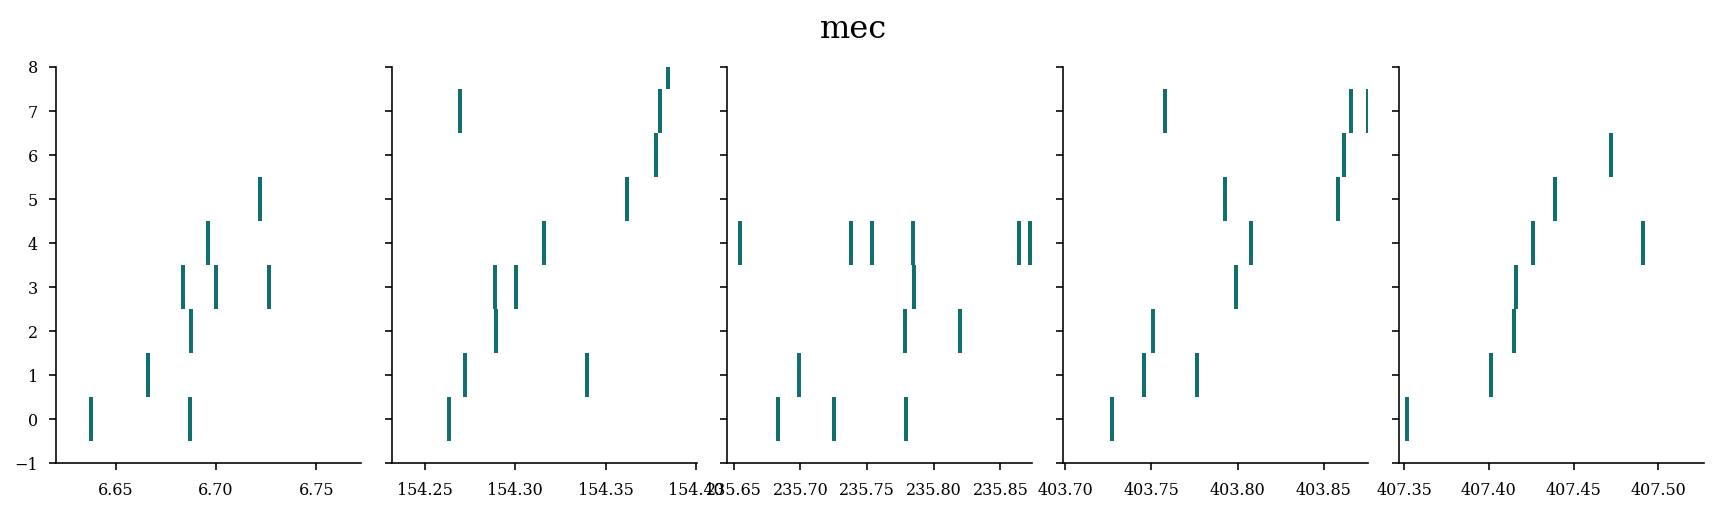

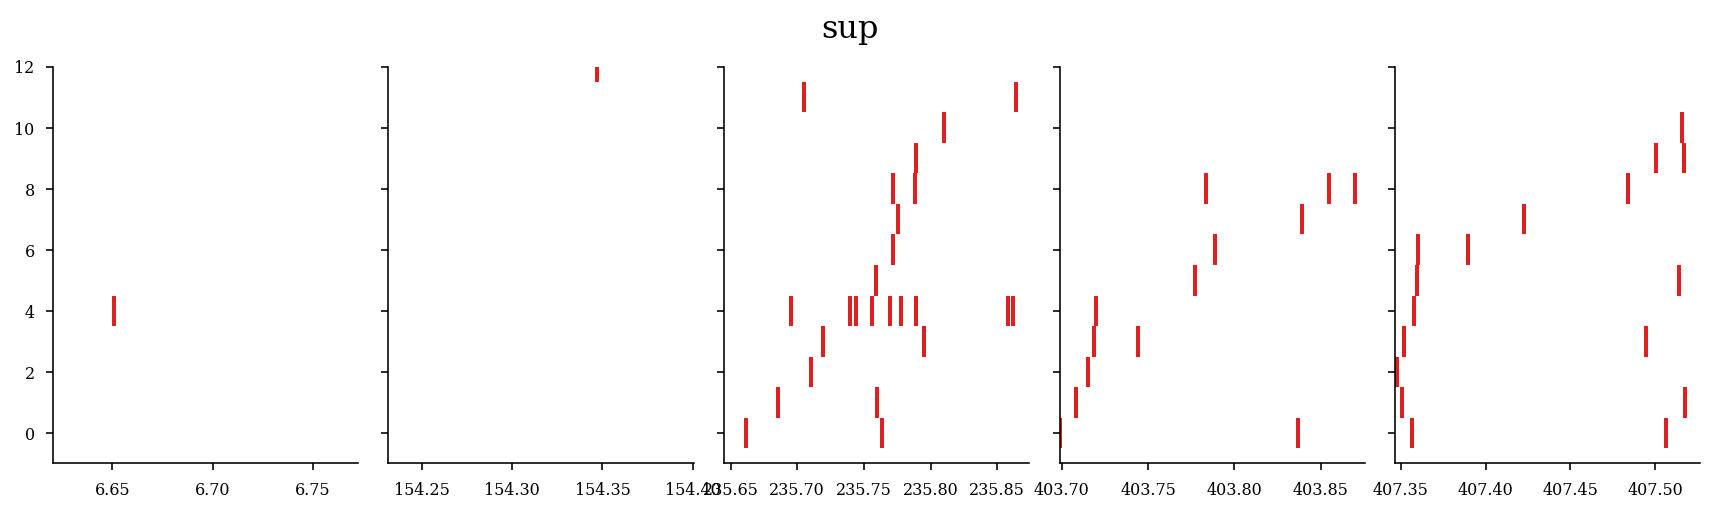

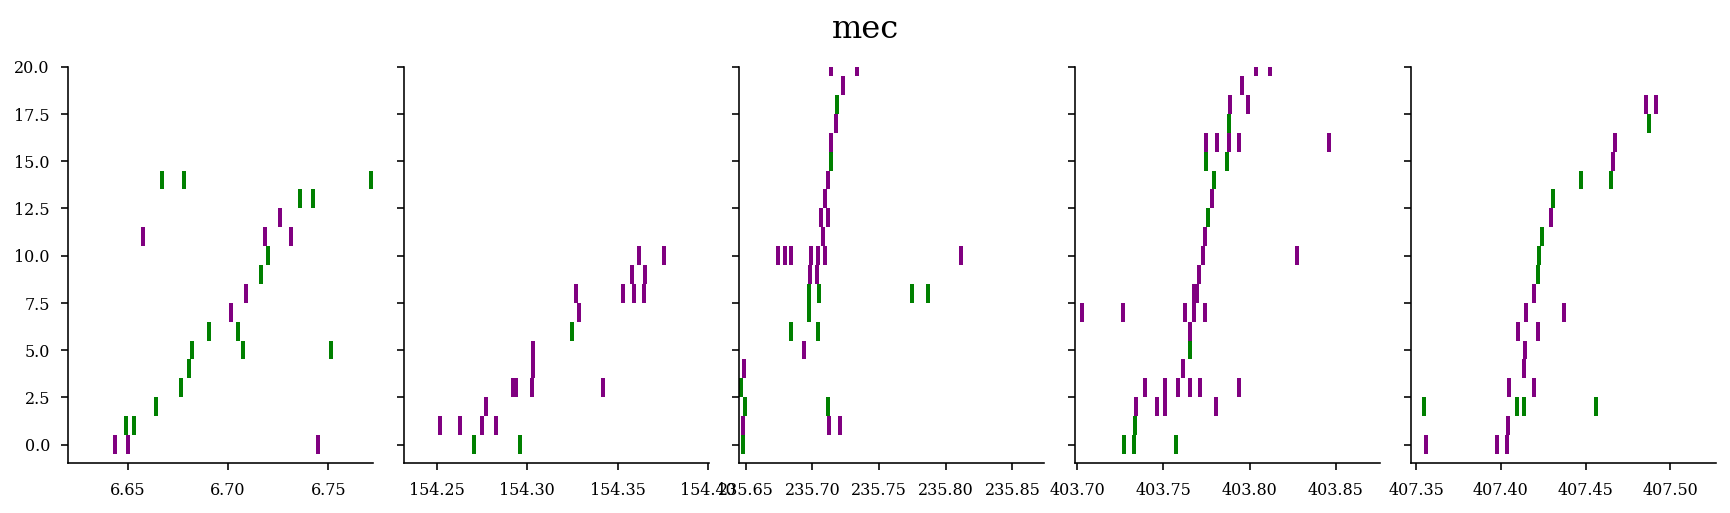

In [67]:
idx = cell_metrics.brainRegion.str.contains("PFC").values
fig,axs = plot_raster_examples(st.iloc[:,idx], replay_canidates, cell_metrics[idx], np.where((temp_df.sig_unit_bias == "sup"))[0][0:5])
fig.suptitle('PFC', fontsize=16)

idx = cell_metrics.brainRegion.str.contains("MEC").values
fig,axs = plot_raster_examples(st.iloc[:,idx], replay_canidates, cell_metrics[idx], np.where((temp_df.sig_unit_bias == "sup"))[0][0:5])
fig.suptitle('MEC', fontsize=16)

idx = cell_metrics.brainRegion.str.contains("CA1").values
fig,axs = plot_raster_examples(st.iloc[:,idx], replay_canidates, cell_metrics[idx], np.where((temp_df.sig_unit_bias == "sup"))[0][0:5])
fig.suptitle('CA1', fontsize=16)

<AxesSubplot:>

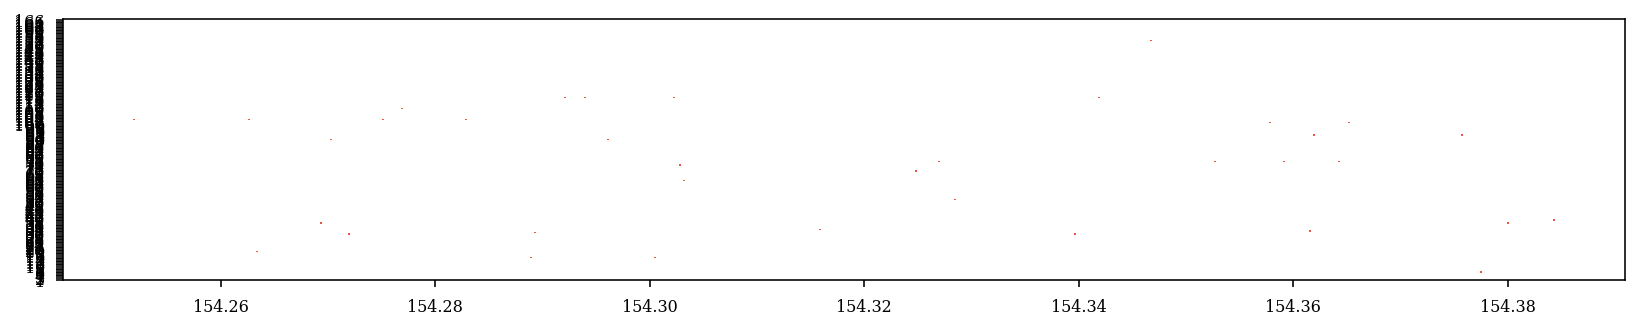

In [40]:
fig, ax = plt.subplots(ncols=1, figsize=(14,2.4))

npl.rasterplot(st[replay_canidates[np.where((temp_df.sig_unit_bias == "sup"))[0][1:2]]], lw=1, ax=ax, color=npl.colors.sweet.red, vertstack=True)

# fig,axs = plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "sup"))[0][0:10])
axs[i].eventplot(
    st[replay_canidates[int(event)]].data[order_idx],
    colors=np.array(colors1)[order_idx],
    linelengths=1,
    linewidths=2,
)

In [45]:
np.where((temp_df.sig_unit_bias == "sup"))[0][0:10]

array([  2,  84, 137, 225, 230, 270, 477, 548, 577, 619], dtype=int64)

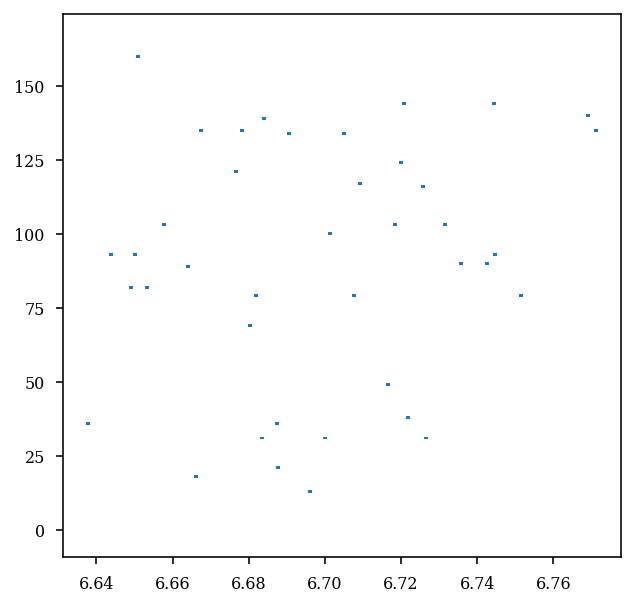

In [52]:
# fig,axs = plot_raster_examples(st, replay_canidates, cell_metrics, np.where((temp_df.sig_unit_bias == "sup"))[0])
plt.figure(figsize=(5,5))
plt.eventplot(st[replay_canidates[2]].data,linelengths=1,
            linewidths=2)
plt.show()